In [1]:
# Importing necessary libraries
import pandas as pd # Data manipulation
import numpy as np # Numerical calculation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns # Advanced data Visualization
import sklearn.datasets # Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Data Gathering and Data Preparation

In [2]:
# Data preprocessing
df=sklearn.datasets.load_iris()
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
x=pd.DataFrame(df['data'],columns=df['feature_names'])
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
label=['Class']
y=pd.DataFrame(df['target'],columns=label)
y,df['target_names']

(     Class
 0        0
 1        0
 2        0
 3        0
 4        0
 ..     ...
 145      2
 146      2
 147      2
 148      2
 149      2
 
 [150 rows x 1 columns],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [5]:
y['Class']=np.where(y['Class']==0,'setosa',y['Class'])
y['Class']=np.where(y['Class']=='1','versicolor',y['Class'])
y['Class']=np.where(y['Class']=='2','virginica',y['Class'])
y

,Class
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [6]:
# Concatenate
df=pd.concat([x,y],axis=1)

In [7]:
x.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

# Exploratory Data Analysis

In [8]:
# First and Second moment business decision
x.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# Third and fourth moment business decision
skewness_x=x.skew()
kurtosis_x=x.kurtosis()
print('Skewness of :', skewness_x)
print('Kurtosis of :', kurtosis_x)

Skewness of : sepal length (cm)    0.314911
sepal width (cm)     0.318966
petal length (cm)   -0.274884
petal width (cm)    -0.102967
dtype: float64
Kurtosis of : sepal length (cm)   -0.552064
sepal width (cm)     0.228249
petal length (cm)   -1.402103
petal width (cm)    -1.340604
dtype: float64


(sepal length (cm)       AxesSubplot(0.125,0.125;0.168478x0.755)
 sepal width (cm)     AxesSubplot(0.327174,0.125;0.168478x0.755)
 petal length (cm)    AxesSubplot(0.529348,0.125;0.168478x0.755)
 petal width (cm)     AxesSubplot(0.731522,0.125;0.168478x0.755)
 dtype: object,
 array([[<AxesSubplot:ylabel='Frequency'>,
         <AxesSubplot:ylabel='Frequency'>,
         <AxesSubplot:ylabel='Frequency'>,
         <AxesSubplot:ylabel='Frequency'>]], dtype=object))

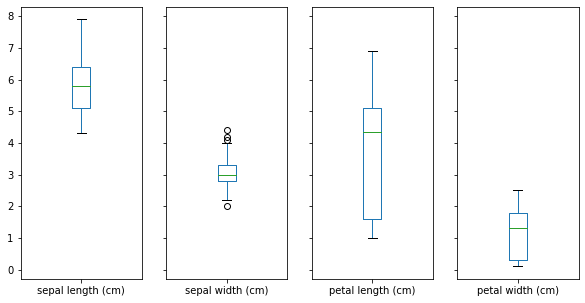

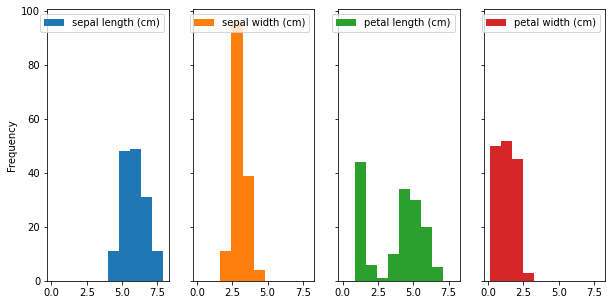

In [10]:
# Univariate Visualization
x.plot(kind='box',subplots=True,layout=(1,4),sharex=False,sharey=True,figsize=(10,5)),x.plot(kind='hist',subplots=True,layout=(1,4),sharey=True,figsize=(10,5))

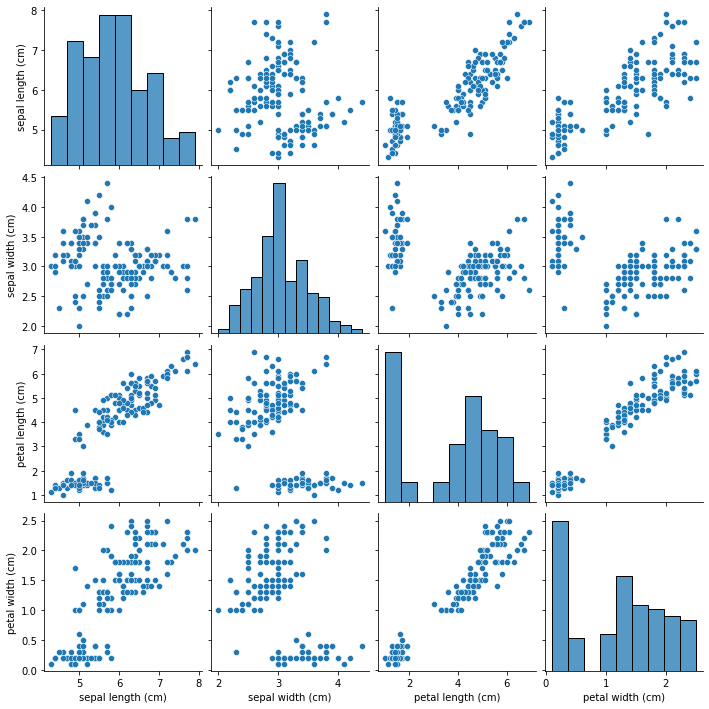

In [11]:
# Bivariate Analysis
sns.pairplot(data=x)

<AxesSubplot:>

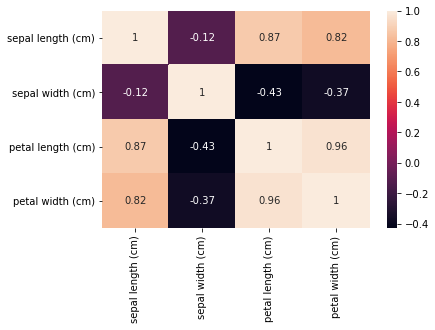

In [12]:
sns.heatmap(x.corr(),annot=True)

In [13]:
# Target Variable analysis 
y.groupby('Class').size()

Class
setosa        50
versicolor    50
virginica     50
dtype: int64

# Model Building and Evaluation

In [14]:
# Splitting data
x_train,x_validation,y_train,y_validation=train_test_split(x,y,test_size=0.20,random_state=1)
x_train.shape,x_validation.shape,y_train.shape,y_validation.shape

((120, 4), (30, 4), (120, 1), (30, 1))

In [15]:
# Model Building
models=[]
models.append(('Linear Discriminant Ananlysis',LinearDiscriminantAnalysis()))
models.append(('Logistic Regression',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('Naive Bayes',GaussianNB()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('SVM',SVC(gamma='auto')))
models.append(('CART',DecisionTreeClassifier()))             

In [16]:
# Evaluate model
results=[]
names=[]
for name,model in models:
    Kfolds=StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
    cv_results=cross_val_score(model,x_train,y_train,scoring='accuracy',cv=Kfolds)
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\U

Linear Discriminant Ananlysis: 0.975000 (0.038188)
Logistic Regression: 0.941667 (0.065085)


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\U

Naive Bayes: 0.950000 (0.055277)
KNN: 0.958333 (0.041667)


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed 

SVM: 0.983333 (0.033333)
CART: 0.941667 (0.038188)


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


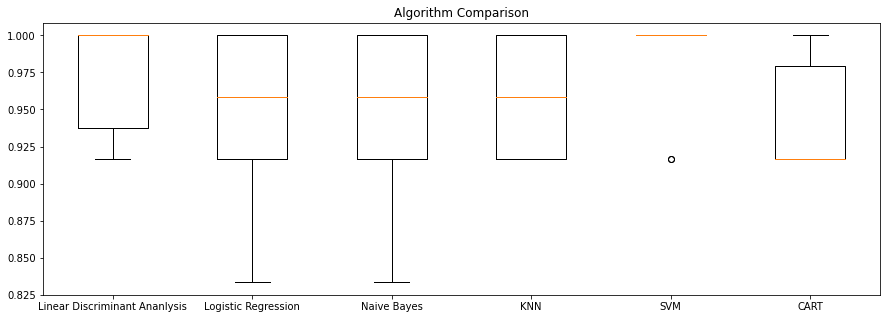

In [17]:
# Comparing Algorithms Accuracy
plt.subplots(figsize=(15,5))
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [18]:
# Selecting best model for prediction
final_model=SVC(gamma='auto')
final_model.fit(x_train,y_train)
prediction=final_model.predict(x_validation)
prediction

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica'],
      dtype=object)

In [19]:
# Evaluate predictions
print(accuracy_score(y_validation, prediction))
print(confusion_matrix(y_validation, prediction))
print(classification_report(y_validation, prediction))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

